In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Krylov as K

In this notebook we discuss the Lanczos procedure for a symmetric matrix $H$. Starting from $H$ and given an arbitrary vector $u_0$ we build the Krylov space and compute the tridiagonal symmetric matrix $T$ that represents the $H$ matrix expressed in the Krilov base. Then we compute the diagonal matrix element of the resolvent of $H$ on $u_{0}$.

We start by building an arbitrary symmetric matix and a normalized column vector

In [11]:
n=100
M=np.matrix(np.random.rand(n*n).reshape(n,n))
H = M + M.T
u0 = np.matrix(np.random.rand(n).reshape(n,1))
u0norm = K.norm(u0)
u0=u0/u0norm
K.norm(u0)

1.0

Now we compute the resolvent of $H$ on $u_{0}$ by using the standard spectral representation of $H$
$$ G(z) = \langle u_{0} | \frac{1}{z-H} | u_{0} \rangle = \sum_{v=1}^{n} \frac{ \langle u_{0} | v \rangle \langle v | u_{0} \rangle }{z-E_v}
$$
where $|v \rangle$ are the eigenvectors of H.

In [12]:
e,w = np.linalg.eigh(H)
K.validate_eigensystem(H,e,w)

Validation terminated


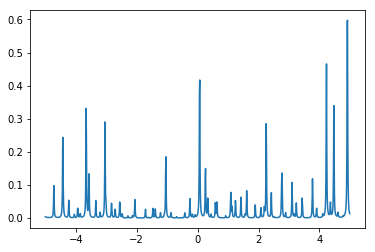

In [13]:
x=np.arange(-5.0, 5.0, 0.01)
plt.plot(x,K.resolvent(u0,e,w,x))

Now we want to reproduce this result using the Lanczos procedure. We build the Krylov space $|\phi_{j}\rangle$ generated by the repeated action of $H$ on the given (normalized) right vector $|u_{0}\rangle$. We use the procedure described in the paper of Gruning. 

The procedure takes as input the values of $|\phi_{j}\rangle,|\phi_{j-1}\rangle,\alpha_{j},\beta_{j}$ and gives $|\phi_{j+1}\rangle,\alpha_{j+1},\beta_{j+1}$ built by the following operations:

$$
|\tilde\phi_{j+1}\rangle = (H-\alpha_{j})|\phi_{j}\rangle - \beta_{j}|\phi_{j-1}\rangle
$$

$$
\beta_{j+1} = || \tilde\phi_{j+1} || \; , \quad
|\phi_{j+1}\rangle = \frac{|\tilde\phi_{j+1}\rangle}{\beta_{j+1}} \; , \quad
\alpha_{j+1} = \langle\phi_{j+1}|H|\phi_{j+1}\rangle
$$

The procedure is initialized as follows:

$$
|\phi_{0}\rangle = |u_{0}\rangle  \; , \quad \alpha_{0} = \langle u_{0}|H|u_{0}\rangle \; , \quad \beta_{0} = 0
$$

We perform the recursion until the Krylov space reaches a given dimension

In [15]:
#reload(K)
dimKrylov = 100
KL=K.KrylovLoop(dimKrylov,H,u0)
KL.iterate()

Dimension Krylov space =  3 Orthogonality check =  True Tridiagonal check =  True
Dimension Krylov space =  4 Orthogonality check =  True Tridiagonal check =  True
Dimension Krylov space =  5 Orthogonality check =  True Tridiagonal check =  True
Dimension Krylov space =  6 Orthogonality check =  True Tridiagonal check =  False
Dimension Krylov space =  7 Orthogonality check =  False Tridiagonal check =  False
Dimension Krylov space =  8 Orthogonality check =  False Tridiagonal check =  False
Dimension Krylov space =  9 Orthogonality check =  False Tridiagonal check =  False
Dimension Krylov space =  10 Orthogonality check =  False Tridiagonal check =  False
Dimension Krylov space =  11 Orthogonality check =  False Tridiagonal check =  False
Dimension Krylov space =  12 Orthogonality check =  False Tridiagonal check =  False
Dimension Krylov space =  13 Orthogonality check =  False Tridiagonal check =  False
Dimension Krylov space =  14 Orthogonality check =  False Tridiagonal check =  

In [6]:
#print(KL.alpha)
#print(KL.beta)
#print(KL.krylov)

In [7]:
#print(K.ortCheck(KL.krylov,dimKrylov))
#print(K.tridiagCheck(H,KL.krylov,KL.alpha,KL.beta,dimKrylov))

Now that the tridiagonal matrix has been built $G(z)$ can be computed in term of a ratio of determinants or as a continuum fraction. Written as a ratio of determinants we have:
$$
G(z) = \frac{D_{1}(z)}{D_{0}(z)}
$$
where $D_{0}(z)$ is the determinant of $z-T$ and $D_{1}(z)$ is the determinant of the submatrix obtained by removing the first row and column from $z-T$. 

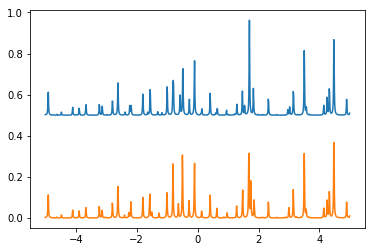

In [8]:
x=np.arange(-5.0, 5.0, 0.01)
y=[K.Gdet(K.Tmatrix(KL.alpha,KL.beta,dimKrylov),val) for val in x]
plt.plot(x,0.5+K.resolvent(u0,e,w,x))
plt.plot(x,y)
plt.show()

Lastly, We implement $G(z)$ as a continued fraction. We use a modified version of the analysis discussed in 
https://rosettacode.org/wiki/Continued_fraction#Python for the generic implementation of the continued fraction.

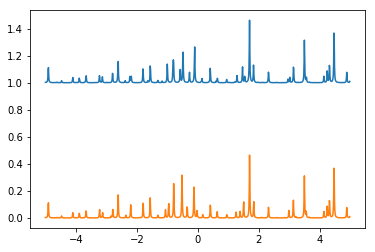

In [9]:
x=np.arange(-5.0, 5.0, 0.01)
plt.plot(x,1+K.resolvent(u0,e,w,x))
plt.plot(x,K.Gfrac(KL.alpha,KL.beta,x))
plt.show()